# Problem Statement
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:
 
Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
train=pd.read_csv('train.csv')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
center=pd.read_csv('fulfilment_center_info.csv')
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal=pd.read_csv('meal_info.csv')
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


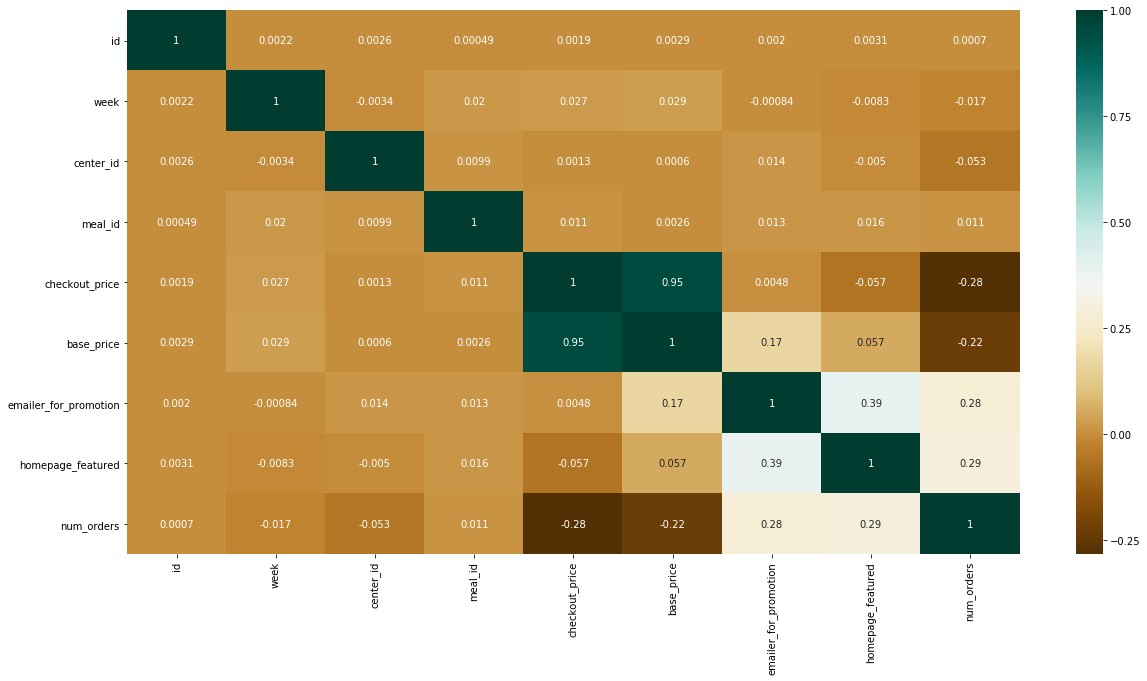

In [8]:
plt.figure(figsize=(20,10))
c=train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.  Set a variable X equal to the input features and a variable y equal to the "num_orders" column. 


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# Create target object and call it y
y = train.num_orders

In [11]:
# Create X
features = ['id','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']
X = train[features]


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [12]:
# Specify Model
client_model = DecisionTreeRegressor(random_state=1)
# Fit Model
client_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [13]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the 
rf_model_on_full_data.fit(train_X, train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [14]:
test_data = pd.read_csv('test_QoiMO9B.csv')


# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features

features = ['id','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']

test_X = test_data[features]

# make predictions which we will submit. 

test_preds = rf_model_on_full_data.predict(test_X)
print(mean_squared_log_error(test_data.id, test_preds))

82.3604378068


In [ ]:
# The lines below shows you how to save your data in the format needed to score it in the competition
output = pd.DataFrame({'id': test_data.id,
                       'num_orders': test_preds})

output.to_csv('submission.csv', index=False)